In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
time=pd.read_csv("D:/ASSIGNMENTS/Assign4 (simple reg)/delivery_time.csv")
time.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [87]:
time.columns=['delivery_time','sorting_time']

In [88]:
time.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

In [89]:
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [90]:
time_train,time_test=train_test_split(time,test_size=0.2,random_state=40)

In [91]:
time_train.describe()

,delivery_time,sorting_time
count,16.000000,16.00000
mean,16.151875,6.00000
std,4.503167,2.42212
min,8.000000,2.00000
25%,13.000000,4.00000
50%,17.255000,6.50000
75%,19.187500,7.25000
max,24.000000,10.00000


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

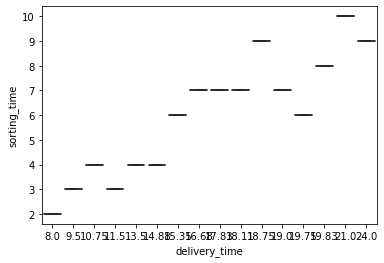

In [92]:
sns.boxplot(x='delivery_time',y='sorting_time',data=time_train,color='green')

(array([2., 1., 1., 1., 2., 1., 4., 2., 1., 1.]),
 array([ 8. ,  9.6, 11.2, 12.8, 14.4, 16. , 17.6, 19.2, 20.8, 22.4, 24. ]),
 <BarContainer object of 10 artists>)

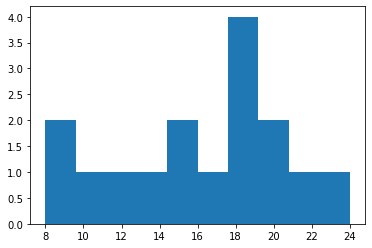

In [93]:
plt.hist(time_train.delivery_time)

(array([1., 2., 3., 0., 0., 2., 4., 1., 2., 1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

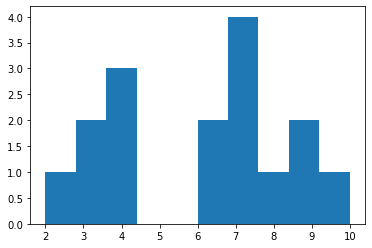

In [94]:
plt.hist(time_train.sorting_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x13273d92280>,
 'caps': [<matplotlib.lines.Line2D at 0x13273d92940>,
 'boxes': [<matplotlib.lines.Line2D at 0x13273d83ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x13273d9d040>],
 'fliers': [<matplotlib.lines.Line2D at 0x13273d9d3a0>],
 'means': []}

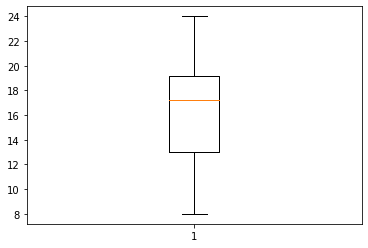

In [95]:
plt.boxplot(time_train.delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x13273df0850>,
 'caps': [<matplotlib.lines.Line2D at 0x13273df0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13273df04f0>],
 'medians': [<matplotlib.lines.Line2D at 0x13273dfc610>],
 'fliers': [<matplotlib.lines.Line2D at 0x13273dfc970>],
 'means': []}

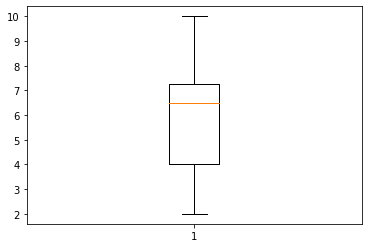

In [96]:
plt.boxplot(time_train.sorting_time)

In [97]:
import statsmodels.formula.api as smf

In [98]:
model_train = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data =time_train).fit()
model_train.summary()

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.890
Model:                               OLS   Adj. R-squared:                  0.882
Method:                    Least Squares   F-statistic:                     112.9
Date:                   Thu, 15 Jul 2021   Prob (F-statistic):           4.37e-08
Time:                           21:24:08   Log-Likelihood:                 14.139
No. Observations:                     16   AIC:                            -24.28
Df Residuals:                         14   BIC:                            -22.73
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6760      0.104     16.174      0.000       1.454       1.898
np.log(sorting_time)     0.6261      0.059     10.628      0.000       0.500       0.752
==============================================================================
Omnibus:                        0.715   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.684
Skew:                           0.234   Prob(JB):                        0.710
Kurtosis:                       2.102   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
time_train['sortingtime_sq']=time_train.sorting_time*time_train.sorting_time

<ipython-input-99-44b0a009c783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_train['sortingtime_sq']=time_train.sorting_time*time_train.sorting_time


In [100]:
time_train['sortingtime_cb']=time_train.sorting_time*time_train.sorting_time*time_train.sorting_time

<ipython-input-100-dfda0b31a149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_train['sortingtime_cb']=time_train.sorting_time*time_train.sorting_time*time_train.sorting_time


In [101]:
model_train1 = smf.ols("delivery_time~sorting_time+sortingtime_sq+sortingtime_cb",data = time_train).fit()
model_train1.summary()

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     26.30
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.46e-05
Time:                        21:24:09   Log-Likelihood:                -30.066
No. Observations:                  16   AIC:                             68.13
Df Residuals:                      12   BIC:                             71.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6519      7.229      0.229      0.823     -14.099      17.403
sorting_time       3.4761      4.253      0.817      0.430      -5.791      12.744
sortingtime_sq    -0.1674      0.748     -0.224      0.827      -1.798       1.463
sortingtime_cb     0.0019      0.041      0.046      0.964      -0.087       0.090
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.001
Skew:                           0.556   Prob(JB):                        0.606
Kurtosis:                       2.486   Cond. No.                     7.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:

model_train.conf_int = 0.05

In [103]:
pred_train=model_train.predict(time_train['sorting_time'])

In [104]:
pred_train

11    2.543991
18    2.110019
17    2.894360
0     3.117671
9     3.051706
13    2.363876
15    2.543991
10    2.977963
3     3.051706
2     2.797848
19    2.894360
12    2.894360
1     2.543991
5     2.797848
7     2.363876
6     2.894360
dtype: float64

In [105]:
pred_train1=np.exp(pred_train)

In [106]:
pred_train1

11    12.730373
18     8.248395
17    18.071936
0     22.593689
9     21.151388
13    10.632082
15    12.730373
10    19.647750
3     21.151388
2     16.409298
19    18.071936
12    18.071936
1     12.730373
5     16.409298
7     10.632082
6     18.071936
dtype: float64

In [107]:
resid=pred_train1-time_train.delivery_time
resid

11    1.980373
18    0.248395
17   -0.038064
0     1.593689
9     2.401388
13   -0.867918
15   -2.149627
10   -0.182250
3    -2.848612
2    -3.340702
19    0.241936
12    1.391936
1    -0.769627
5     1.059298
7     1.132082
6    -0.928064
dtype: float64

Text(0, 0.5, 'Actual time')

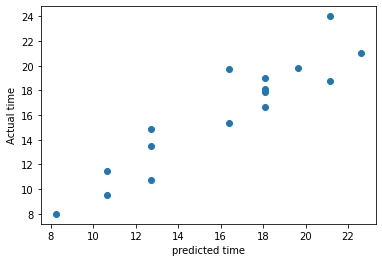

In [108]:
plt.scatter(pred_train1,time_train.delivery_time)
plt.xlabel("predicted time")
plt.ylabel('Actual time')

In [109]:
np.sqrt(np.mean(resid*resid))

1.6360619000658487

In [110]:
#RSME=2.88

In [111]:
test_pred=model_train.predict(time_test)

In [112]:
test_pred

16    2.797848
20    2.683699
14    2.363876
4     3.117671
8     3.117671
dtype: float64

In [113]:
np.sqrt(np.mean(resid*resid))

1.6360619000658487